In [63]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi, e,  cos, sin

In [124]:
def compare_functions(func, D, name):
    x = np.linspace(0.00001, 10, 2**10)
    y1 = [func(i) for i in x]
    
    y2 = FFT(y1)
    n = len(x)
    n_to_delete = int(D * n)
    n_left = n - n_to_delete
    for i in range(n_to_delete):
        y2[i+n_left] = 0
    y2 = FFTReverse(y2)
    
    fig, ax = plt.subplots(figsize=(7, 5))
    ax.set_title(f"Графики: f(x) = {name}, f2 (with FFT), D = {D}", fontsize=16)
    ax.set_xlabel("x", fontsize=14)        
    ax.set_ylabel("y", fontsize=14)
    ax.grid(which="major", linewidth=1.2)
    ax.grid(which="minor", linestyle="--", color="gray", linewidth=0.5)
    series = {
        ax.scatter(x, y2, c="red", label="FFT", s=3)
    }
    ax.plot(x, y1, label="f(x)")
    ax.legend()
    
    plt.show()

In [69]:
def FFT(array_of_values):
    n = len(array_of_values)
    
    if (n == 1):
        return array_of_values[:]
    
    even_indexes = FFT(array_of_values[0::2])
    odd_indexes = FFT(array_of_values[1::2])
    
    w = complex(1, 0)
    angle = 2 * pi / n
    w_n = complex(cos(angle), sin(angle))
    
    result = [complex(0, 0) for i in range(n)]
    shift = n // 2
    for i in range(n // 2):
        result[i] = odd_indexes[i] * w + even_indexes[i]
        result[i + shift] = -odd_indexes[i] * w + even_indexes[i]
        w *= w_n
        
    return result

In [68]:
def FFTReverse(array_of_values):
    n = len(array_of_values)
    
    if (n == 1):
        return array_of_values[:]
    
    even_indexes = FFTReverse(array_of_values[0::2])
    odd_indexes = FFTReverse(array_of_values[1::2])
    
    w = complex(1, 0)
    angle = -2 * pi / n
    w_n = complex(cos(angle), sin(angle))
    
    result = [complex(0, 0) for i in range(n)]
    shift = n // 2
    for i in range(n // 2):
        result[i] = odd_indexes[i] * w + even_indexes[i]
        result[i + shift] = -odd_indexes[i] * w + even_indexes[i]
        w = w * w_n
        result[i] /= 2
        result[i + shift] /= 2
        
    return result

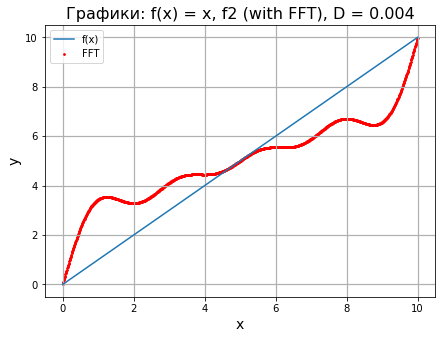

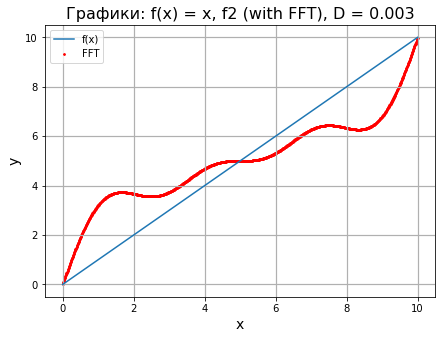

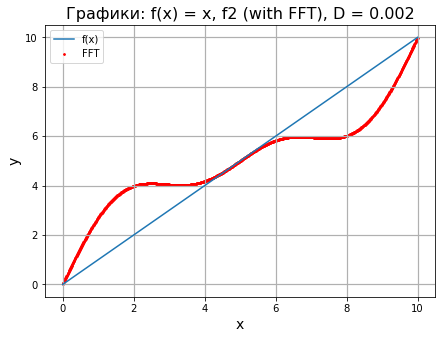

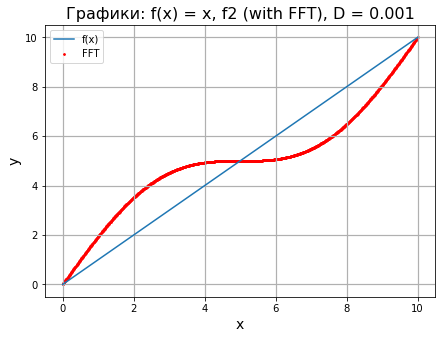

In [125]:
compare_functions(lambda x : x, 0.004, "x")
compare_functions(lambda x : x, 0.003, "x")
compare_functions(lambda x : x, 0.002, "x")
compare_functions(lambda x : x, 0.001, "x")

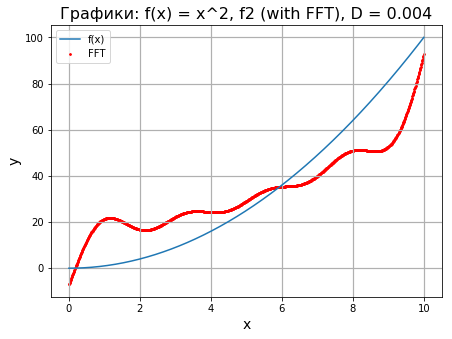

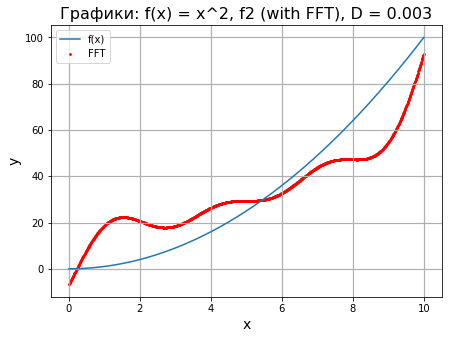

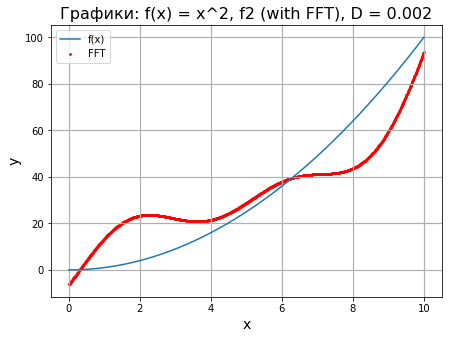

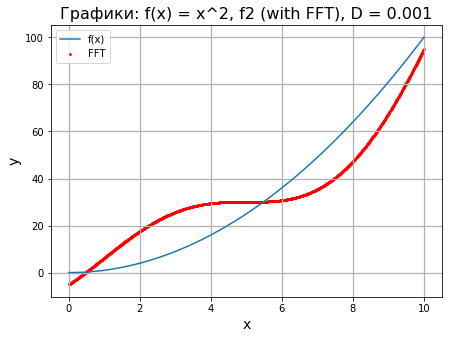

In [127]:
compare_functions(lambda x : x**2, 0.004, "x^2")
compare_functions(lambda x : x**2, 0.003, "x^2")
compare_functions(lambda x : x**2, 0.002, "x^2")
compare_functions(lambda x : x**2, 0.001, "x^2")

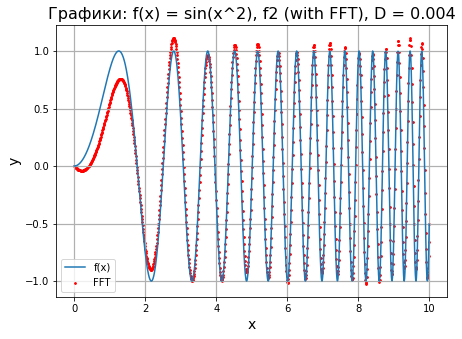

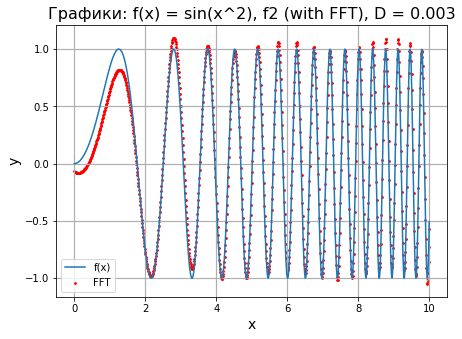

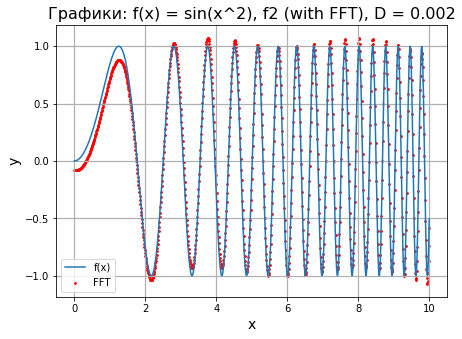

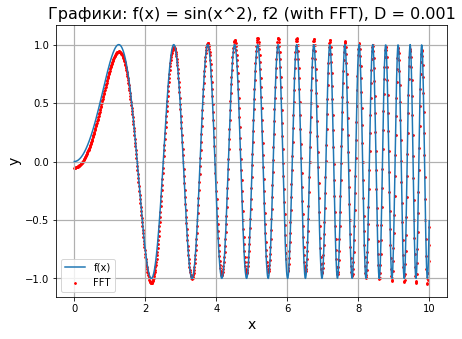

In [128]:
compare_functions(lambda x : sin(x**2), 0.004, "sin(x^2)")
compare_functions(lambda x : sin(x**2), 0.003, "sin(x^2)")
compare_functions(lambda x : sin(x**2), 0.002, "sin(x^2)")
compare_functions(lambda x : sin(x**2), 0.001, "sin(x^2)")

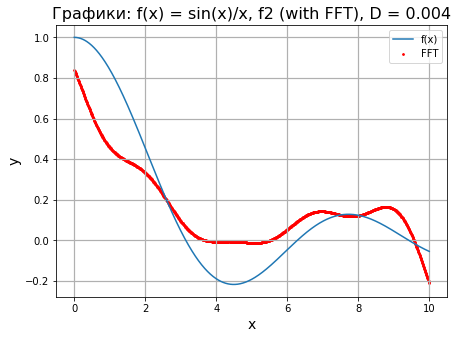

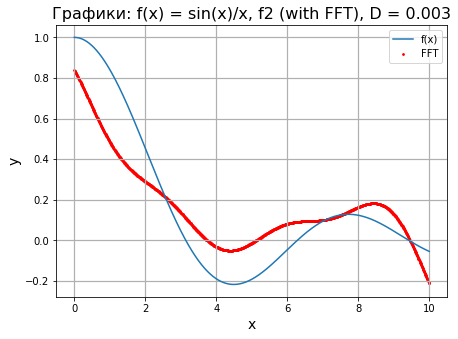

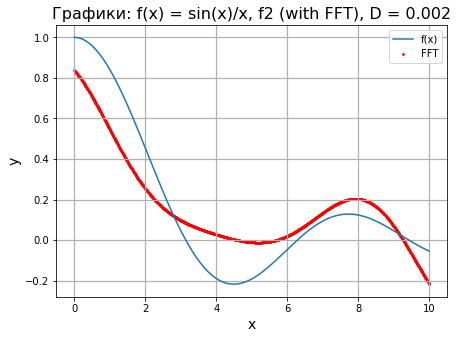

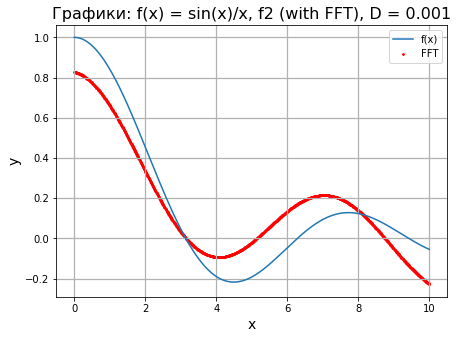

In [129]:
compare_functions(lambda x : sin(x)/x, 0.004, "sin(x)/x")
compare_functions(lambda x : sin(x)/x, 0.003, "sin(x)/x")
compare_functions(lambda x : sin(x)/x, 0.002, "sin(x)/x")
compare_functions(lambda x : sin(x)/x, 0.001, "sin(x)/x")

**Вывод**: для любой из исследуемых функций процент удалённых последних точек из FFT перед обратным FFT, при котором разница видна невооружённым глазом, равен 0,1%